In [1]:
import numpy as np
import pandas as pd
import MMTMSS.models.simple_cascade as sc
import MMTMSS.analysis.dissimilarity as ds

In [2]:
distribution_paris = np.load('data/paris_household.npy')

/tmp/ipykernel_1063/147532401.py:1: RuntimeWarning: invalid value encountered in divide
  plt.imshow(distribution_paris[:,:,0]/(distribution_paris[:,:,0]+distribution_paris[:,:,1]), vmin=0,  cmap='RdYlBu_r')


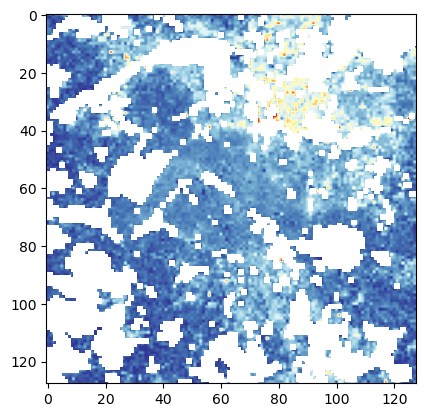

In [73]:
plt.imshow(distribution_paris[:,:,0]/(distribution_paris[:,:,0]+distribution_paris[:,:,1]), vmin=0,  cmap='RdYlBu_r')

/home/onyxia/work/MMTMSS/MMTMSS/analysis/dissimilarity.py:32: RuntimeWarning: divide by zero encountered in log2
  Entropie_locale = np.nansum((- np.log2(P0local) * P0local - np.log2(P1local) * P1local) *  np.sum(distributionnonnull, axis=1)/ np.sum(distributionnonnull) )
/home/onyxia/work/MMTMSS/MMTMSS/analysis/dissimilarity.py:32: RuntimeWarning: invalid value encountered in log2
  Entropie_locale = np.nansum((- np.log2(P0local) * P0local - np.log2(P1local) * P1local) *  np.sum(distributionnonnull, axis=1)/ np.sum(distributionnonnull) )
/home/onyxia/work/MMTMSS/MMTMSS/analysis/dissimilarity.py:32: RuntimeWarning: invalid value encountered in multiply
  Entropie_locale = np.nansum((- np.log2(P0local) * P0local - np.log2(P1local) * P1local) *  np.sum(distributionnonnull, axis=1)/ np.sum(distributionnonnull) )


<Axes: xlabel='resolution', ylabel='dindex'>

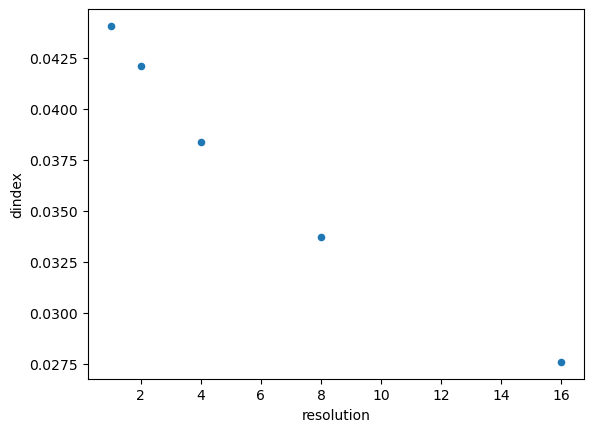

In [3]:
dissimilarity_paris = ds.dissimilarity_analyze(distribution_paris, [1,2,4,8,16])
dissimilarity_paris.plot.scatter('resolution', 'dindex')

In [ ]:
ratio = np.sum(distribution_paris[:,:,0]) / np.sum(distribution_paris[:,:,1])

res=[]
for s1 in np.arange(0, .55, .025):
    print(s1)
    for s2 in np.arange(0, .55, .025):
        for c in np.arange(-1,1,0.025):
            temp = []
            
            for l in range(20):
                tdis = sc.multivariate_lognormal_cascade(6,
                                                       sigma1=s1,
                                                       sigma2=s2,
                                                       corr=c,
                                                       seed=l)
                tdis[:,:,0] = tdis[:,:,0] * ratio
                tdis2 = ds.dissimilarity_analyze(tdis,[1,2,4,8,16])   
                tdis2['l'] = l
                temp.append(tdis2  )
            temp = pd.concat(temp)
            temp['sigma1']=s1
            temp['sigma2']=s2
            temp['corr']=c

            res.append(temp)
     


0.0


In [167]:
res2 = pd.concat(res)      
res2= res2.merge(dissimilarity_paris, on='resolution')
res2['diff'] = (res2.dindex_x - res2.dindex_y)**2
res2['id'] = res2.sigma1.round(2).astype(str) + '_' + res2.sigma2.round(2).astype(str) + '_' + res2['corr'].round(2).astype(str)
temp = res2.groupby(['id', 'l'], as_index=False)['diff'].mean()
temp['diff'] = np.sqrt(temp['diff'] /5)

In [168]:
temp.sort_values('diff').head()

,id,l,diff
402973,0.2_0.25_0.7,13,0.000133
665533,0.48_0.4_0.9,13,0.000142
332593,0.25_0.25_0.73,13,0.000155
201529,0.15_0.3_0.9,9,0.000158
228629,0.18_0.28_0.78,9,0.000162


In [205]:
tdis = sc.multivariate_lognormal_cascade(6,sigma1=0.2,sigma2=.25, corr=.7,seed=13)
tdis[:,:,0] = tdis[:,:,0] * ratio

In [169]:
res2[(res2.id=='0.2_0.25_0.7')&(res2.l==13)]

,resolution,dindex_x,l,sigma1,sigma2,corr,dindex_y,diff,id
298973,1,0.043729,13,0.2,0.25,0.7,0.044080,1.229065e-07,0.2_0.25_0.7
1073373,2,0.042526,13,0.2,0.25,0.7,0.042117,1.674069e-07,0.2_0.25_0.7
1847773,4,0.038283,13,0.2,0.25,0.7,0.038359,5.763488e-09,0.2_0.25_0.7
2622173,8,0.033348,13,0.2,0.25,0.7,0.033709,1.299689e-07,0.2_0.25_0.7
3396573,16,0.027463,13,0.2,0.25,0.7,0.027578,1.315267e-08,0.2_0.25_0.7


In [51]:
res3 = pd.concat(res)      
res3 = res3.groupby(['sigma1', 'sigma2', 'corr', 'resolution'], as_index=False)['dindex'].mean()
res3= res3.merge(dissimilarity_paris, on='resolution')
res3['diff'] = (res3.dindex_x - res3.dindex_y)**2
res3['id'] = res3.sigma1.round(2).astype(str) + '_' + res3.sigma2.round(2).astype(str) + '_' + res3['corr'].round(2).astype(str)
temp = res3.groupby(['id'], as_index=False)['diff'].mean()
temp['diff'] = np.sqrt(temp['diff'] /5)

In [52]:
temp.sort_values('diff').head()

,id,diff
24559,0.35_0.52_0.98,0.000524
26318,0.38_0.52_0.95,0.000596
19038,0.28_0.45_0.95,0.000710
26397,0.38_0.5_0.93,0.000778
22879,0.32_0.5_0.98,0.000790


In [53]:
res3[res3.id=='0.35_0.52_0.98']

,sigma1,sigma2,corr,resolution,dindex_x,dindex_y,diff,id
26399,0.35,0.525,0.975,1,0.044005,0.044080,5.579678e-09,0.35_0.52_0.98
65119,0.35,0.525,0.975,2,0.043594,0.042117,2.181498e-06,0.35_0.52_0.98
103839,0.35,0.525,0.975,4,0.037988,0.038359,1.374375e-07,0.35_0.52_0.98
142559,0.35,0.525,0.975,8,0.032258,0.033709,2.103570e-06,0.35_0.52_0.98
181279,0.35,0.525,0.975,16,0.026014,0.027578,2.445485e-06,0.35_0.52_0.98


In [135]:
ds.dissimilarity_analyze(tdis,[1,2,4,8,16])  

In [66]:
import matplotlib.pyplot as plt

In [141]:
import MMTMSS.analysis.boxcounting as bc
from sklearn.linear_model import LinearRegression

In [204]:
tdis = sc.multivariate_lognormal_cascade(6,sigma1=0.55, sigma2=0.50,  corr=-.45,   seed=11)
analyze= bc.multifractal_analyze(tdis, [8,16])
analyze2= bc.multifractal_analyze(distribution_paris, [8,16])

print(LinearRegression().fit(analyze.lresolution.values.reshape(-1, 1), analyze.I_0).coef_)
print(LinearRegression().fit(analyze2.lresolution.values.reshape(-1, 1), analyze2.I_0).coef_)
print(LinearRegression().fit(analyze.lresolution.values.reshape(-1, 1), analyze.I_1).coef_)
print(LinearRegression().fit(analyze2.lresolution.values.reshape(-1, 1), analyze2.I_1).coef_)
print(LinearRegression().fit(analyze.lresolution.values.reshape(-1, 1), analyze.I_01).coef_)
print(LinearRegression().fit(analyze2.lresolution.values.reshape(-1, 1), analyze2.I_01).coef_)
tdis[:,:,0] = tdis[:,:,0] * ratio

[-1.7664613]
[-1.85270886]
[-1.84861348]
[-1.85309852]
[-1.71973364]
[-1.68957265]


/home/onyxia/work/MMTMSS/MMTMSS/analysis/boxcounting.py:74: RuntimeWarning: divide by zero encountered in log2
  return((-np.nansum(frac[:,:,0]*np.log2(frac[:,:,0])), -np.nansum(frac[:,:,1]*np.log2(frac[:,:,1])) ,  -np.nansum(P*np.log2(P)),-np.nansum(frac[:,:,0]*np.log2(frac[:,:,1]/frac[:,:,0])) ))
/home/onyxia/work/MMTMSS/MMTMSS/analysis/boxcounting.py:74: RuntimeWarning: invalid value encountered in multiply
  return((-np.nansum(frac[:,:,0]*np.log2(frac[:,:,0])), -np.nansum(frac[:,:,1]*np.log2(frac[:,:,1])) ,  -np.nansum(P*np.log2(P)),-np.nansum(frac[:,:,0]*np.log2(frac[:,:,1]/frac[:,:,0])) ))
/home/onyxia/work/MMTMSS/MMTMSS/analysis/boxcounting.py:74: RuntimeWarning: invalid value encountered in divide
  return((-np.nansum(frac[:,:,0]*np.log2(frac[:,:,0])), -np.nansum(frac[:,:,1]*np.log2(frac[:,:,1])) ,  -np.nansum(P*np.log2(P)),-np.nansum(frac[:,:,0]*np.log2(frac[:,:,1]/frac[:,:,0])) ))


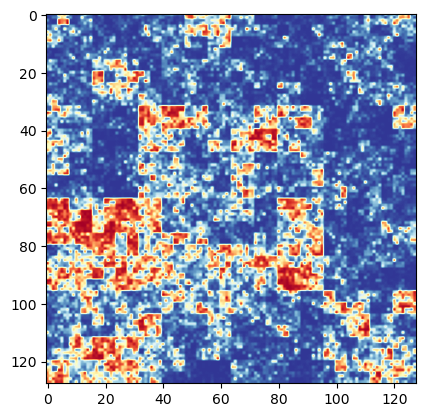

In [201]:

plt.imshow(tdis[:,:,0]/(tdis[:,:,0]+tdis[:,:,1]), vmin=0,  cmap='RdYlBu_r')

In [202]:
ds.dissimilarity_analyze(tdis,[1,2,4,8,16])  

,resolution,dindex
0,1,0.438560
1,2,0.419072
2,4,0.359701
3,8,0.286095
4,16,0.197639


(array([2650., 8434., 3714., 1285.,  268.,   33.,    0.,    0.,    0.,
           0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

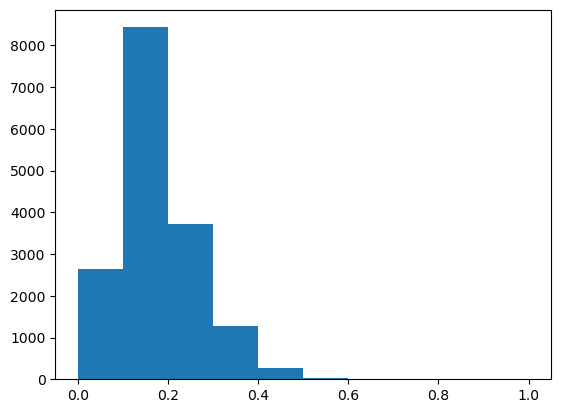

In [206]:
plt.hist((tdis[:,:,0]/(tdis[:,:,0]+tdis[:,:,1])).flatten(),range=(0,1))

/tmp/ipykernel_1063/3496154880.py:1: RuntimeWarning: invalid value encountered in divide
  plt.hist((distribution_paris[:,:,0]/(distribution_paris[:,:,0]+distribution_paris[:,:,1])).flatten(), range=(0,1))


(array([4.819e+03, 4.469e+03, 1.863e+03, 7.980e+02, 2.000e+02, 7.300e+01,
        2.000e+01, 8.000e+00, 2.000e+00, 0.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

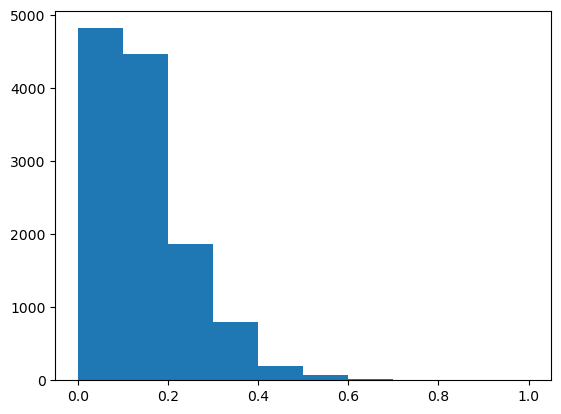

In [166]:
plt.hist((distribution_paris[:,:,0]/(distribution_paris[:,:,0]+distribution_paris[:,:,1])).flatten(), range=(0,1))


In [134]:
print(LinearRegression().fit(analyze.lresolution.values.reshape(-1, 1), analyze.I_01).coef_)
print(LinearRegression().fit(analyze2.lresolution.values.reshape(-1, 1), analyze2.I_01).coef_)

[-1.63793796]
[-1.78070233]


In [92]:
a.coef_

array([-1.91471012])

In [93]:
a=LinearRegression().fit(analyze.lresolution.values.reshape(-1, 1), analyze.I_01)
a.coef_

array([-1.51923467])